In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from tqdm import trange, tqdm
import os

In [146]:
# In an electric field (with B=0)
# quantum numbers
nmin = 3
nmax = 3
S = 1

m_vals = np.array([0,1])
n_vals, L_vals, J_vals, neff, En, H_0, mat_S = [], [], [], [], [], [], []

for m_val in m_vals:
    n_vals_tmp, L_vals_tmp = get_nl_vals(nmin, nmax, m_val)
    J_vals_tmp = get_J_vals(S, L_vals_tmp, diff=1)
    # quantum defects
    neff_tmp = n_vals_tmp - get_qd(S, n_vals_tmp, L_vals_tmp, J_vals_tmp)
    # energy levels
    En_tmp = W_n(S, n_vals_tmp, L_vals_tmp, J_vals_tmp)
    # field-free Hamiltonian
    H_0_tmp = np.diag(En_tmp)
    # find the off-diagonal terms of the Stark interaction matrix
    mat_S_tmp = stark_matrix_select_m(neff_tmp, L_vals_tmp, m_val)
    
    # Save each m variable into arrays
    n_vals.append(n_vals_tmp)
    L_vals.append(L_vals_tmp)
    J_vals.append(J_vals_tmp) 
    neff.append(neff_tmp) 
    En.append(En_tmp) 
    H_0.append(H_0_tmp)
    mat_S.append(mat_S_tmp)

calculate Stark terms: 100%|█████████████████████████████| 2/2 [00:00<?, ?it/s]


In [147]:
mat_S[1] * (e*a_0) * 1e28

array([[ 0.        ,  0.38502003],
       [ 0.38502003,  0.        ]])

In [148]:
# specify the electric field
field = np.linspace(0.00, 10**7, 101) # V /cm
field_au = field * 100 * e * a_0 / En_h

# diagonalise for each field
eig_vals, eig_vecs = [], []
for m_idx, m_val in enumerate(m_vals):
    eig_vals_tmp, eig_vecs_tmp = stark_map_vec(H_0[m_idx], mat_S[m_idx], field_au)
    eig_vals.append(eig_vals_tmp)
    eig_vecs.append(eig_vecs_tmp)

diagonalise Hamiltonian: 100%|█████████████| 101/101 [00:00<00:00, 5738.62it/s]


In [149]:
#eig_vecs[0][10]

## Transition dipole moment between two states

In [151]:
m_i, m_f = 0, 1

m_idx_i, m_idx_f = np.where(m_vals==m_i)[0][0], np.where(m_vals==m_f)[0][0]
tm = []
for idx_i, L_val_i in enumerate(L_vals[m_idx_i]):
    for idx_f, L_val_f in enumerate(L_vals[m_idx_f]):
        if ( np.abs(L_val_i - L_val_f) == 1 ):
            print(L_val_i, L_val_f)
            tm.append([0,0,0]) 
            tm[len(tm)-1][0] = L_val_i
            tm[len(tm)-1][1] = L_val_f
            tm[len(tm)-1][2] = stark_int(neff[m_idx_i][idx_i], neff[m_idx_f][idx_f], L_val_i, L_val_f, m_i, m_f)
tm = np.array(tm)

0 1
1 2
2 1


In [144]:
tm

array([[  0.        ,   1.        ,  -6.4980455 ],
       [  0.        ,   1.        ,  -0.82861833],
       [  1.        ,   2.        ,  -4.54121227],
       [  1.        ,   2.        ,  -2.832542  ],
       [  2.        ,   1.        ,   2.62187013],
       [  2.        ,   1.        ,   0.48765393],
       [  2.        ,   3.        ,  -4.22178568],
       [  0.        ,   1.        ,  -3.17784315],
       [  0.        ,   1.        , -12.05770265],
       [  1.        ,   2.        ,  -0.84464139],
       [  1.        ,   2.        ,  -9.34475274],
       [  2.        ,   1.        ,   1.63536889],
       [  2.        ,   1.        ,   5.39519551],
       [  2.        ,   3.        ,  -6.57458495],
       [  3.        ,   2.        ,   2.98525328],
       [  3.        ,   2.        ,   4.64893361]])

[-0.99971621 -0.0237684   0.00159897]


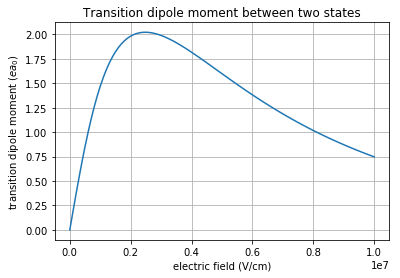

In [122]:
state_i = 0
state_f = 1

I = np.zeros(len(field))
for k, F in enumerate(field):
    
    Vi = eig_vecs[m_idx_i][k, state_i, :]
    Vf = eig_vecs[m_idx_f][k, state_f, :]
    
    if (k==2): print(Vi); 
    
    for from_i in range(len(Vi)):
        for to_i in range(len(Vf)):    
            if np.abs(L_vals[m_idx_i][from_i] - L_vals[m_idx_f][to_i]) == 1: 
                for tm_i in range(len(tm[:,0])):
                    if (tm[tm_i,0] == L_vals[m_idx_i][from_i]) and (tm[tm_i,1] == L_vals[m_idx_f][to_i]):
                        I[k] += (Vi[from_i] * Vf[to_i] * np.abs(tm[tm_i,2]));
                        
plt.plot(field, np.abs(I))
plt.grid()
plt.xlabel('electric field (V/cm)')
plt.ylabel('transition dipole moment ($e a_0$)')
plt.title('Transition dipole moment between two states')

-

In [11]:
nmin = 3
nmax = 3
S = 1
n_vals, L_vals, m_vals = get_nlm_vals(nmin, nmax)
J_vals = get_J_vals(S, L_vals, 1)
# quantum defects
neff = n_vals - get_qd(S, n_vals, L_vals, J_vals)
# energy levels
En = W_n(S, n_vals, L_vals, J_vals)
# field-free Hamiltonian
H_0 = np.diag(En)
mat_S = stark_matrix(neff, L_vals, m_vals, dm_allow=[0])

calculate Stark terms: 100%|████████████████████| 9/9 [00:00<00:00, 576.92it/s]


In [12]:
# specify the electric field
field = np.linspace(0.00, 10**7, 101) # V /cm
field_au = field * 100 * e * a_0 / En_h
# diagonalise for each field
eig_vals, eig_vecs = stark_map_vec(H_0, mat_S, field_au)

diagonalise Hamiltonian: 100%|███████████████████████| 101/101 [00:00<?, ?it/s]


In [21]:
eig_vecs[10,:,:][np.where(m_vals==0)[0],:]

array([[-0.99302594, -0.        ,  0.        ,  0.11315504,  0.        ,
         0.        ,  0.        ,  0.        ,  0.03309712],
       [ 0.11754586, -0.        ,  0.        ,  0.92863955,  0.        ,
         0.        ,  0.        ,  0.        ,  0.35186868],
       [-0.00908042,  0.        ,  0.        , -0.35330515,  0.        ,
         0.        ,  0.        ,  0.        ,  0.93546406]])

[ -9.99149858e-01  -8.96240190e-23  -6.62363790e-16]


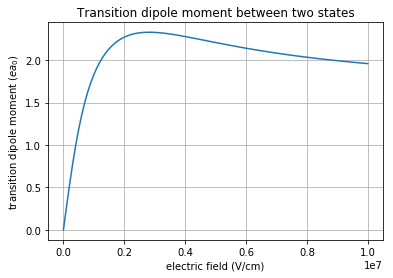

In [10]:
state_i = 0
state_f = 1

m_i, m_f = 0, 1
#m_idx_i, m_idx_f = np.where(m_vals==m_i)[0][0], np.where(m_vals==m_f)[0][0]

I = np.zeros(len(field))
for k, F in enumerate(field):
    
    Vi = eig_vecs[k,:,:][np.where(m_vals==m_i)[0],:][:,np.where(m_vals==m_i)[0]][state_i, :]
    Vf = eig_vecs[k,:,:][np.where(m_vals==m_f)[0],:][:,np.where(m_vals==m_f)[0]][state_f, :]
    mat_S_k = mat_S[np.where(m_vals==m_i)[0],:][:,np.where(m_vals==m_f)[0]]
    
    if (k==2): print(Vi); 
    
    #Vi = eig_vecs[m_idx_i][k, state_i, :]
    #Vf = eig_vecs[m_idx_f][k, state_f, :]
    
    I[k] = np.sum( np.outer(Vi, Vf) * np.abs(mat_S_k) )
    
    #for from_i in range(len(Vi)):
    #    for to_i in range(len(Vf)):    
    #        if np.abs(L_vals[m_idx_i][from_i] - L_vals[m_idx_f][to_i]) == 1: 
    #            for tm_i in range(len(tm[:,0])):
    #                if (tm[tm_i,0] == L_vals[m_idx_i][from_i]) and (tm[tm_i,1] == L_vals[m_idx_f][to_i]):
    #                    I[k] += (Vi[from_i] * Vf[to_i] * np.abs(tm[tm_i,2]));
                        
plt.plot(field, np.abs(I))
plt.grid()
plt.xlabel('electric field (V/cm)')
plt.ylabel('transition dipole moment ($e a_0$)')
plt.title('Transition dipole moment between two states')

## Stark map

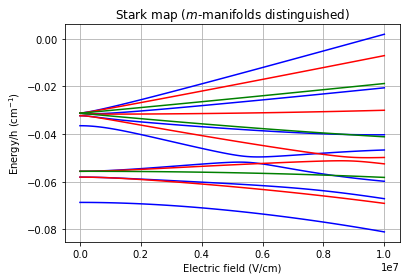

In [109]:
colours = ['b', 'r', 'g', 'k', 'm', 'c']

for i in range(len(m_vals)):
    for j in range(len(eig_vals[i][0])): 
        plt.plot(field, eig_vals[i][:,j], '-', color=colours[np.mod(i, len(colours))])
  
plt.grid()
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Energy/h (cm$^{-1}$)')
plt.title('Stark map ($m$-manifolds distinguished)')

## Transition dipole moment between two states -2

State 1: 		 n= 3 , l= 0 , m= 0
State 2: 		 n= 3 , l= 2 , m= -1


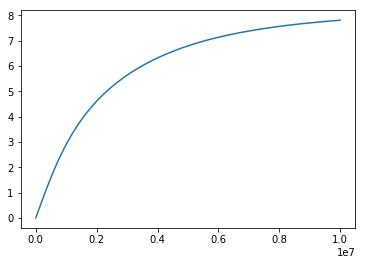

In [26]:
state_1 = 0
state_2 = 5
print('State 1: \t\t n=', n_vals[state_1], ', l=', L_vals[state_1], ', m=', m_vals[state_1])
print('State 2: \t\t n=', n_vals[state_2], ', l=', L_vals[state_2], ', m=', m_vals[state_2])

transition_dipole_moment = []
for i, f in enumerate(field):
    weightings = np.abs( np.outer( eig_vecs_ord[i,state_1], eig_vecs_ord[i,state_2] ) )
    transition_dipole_moment.append( np.sum( mat_S * weightings ) )

plt.plot(field, transition_dipole_moment)

## State character of a state

State: 		 n= 7 , l= 0 , m= 0
Character: 	 n= 7 , l= 1 , m= 1


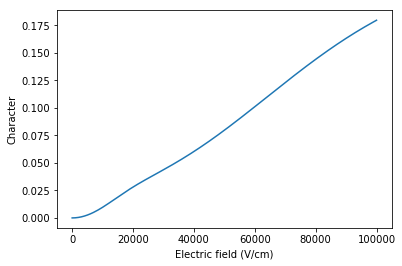

In [19]:
state = 5**2 + 6**2 + 0
character = 5**2 + 6**2 + 3
print('State: \t\t n=', n_vals[state], ', l=', L_vals[state], ', m=', m_vals[state])
print('Character: \t n=', n_vals[character], ', l=', L_vals[character], ', m=', m_vals[character])

plt.plot(field, np.abs(eig_vecs[:,state,character]**2))
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Character')

## L character of a state

State: 		 n= 7 , l= 2 , m= 0
Character: 		 l= 2


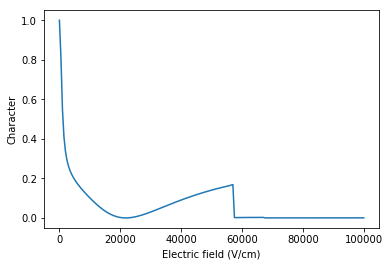

In [21]:
state = 5**2 + 6**2 + 6 
L_char = 2
print('State: \t\t n=', n_vals[state], ', l=', L_vals[state], ', m=', m_vals[state])
print('Character: \t\t l=', L_char )

eig_vec_with_char = eig_vecs[:, state, np.where(L_vals==L_char)]
plt.plot(field, np.sum( eig_vec_with_char**2, axis=2 ) )
plt.xlabel('Electric field (V/cm)')
plt.ylabel('Character')

## L character of states

State from: 		 n= 6 , l= 5 , m= 0
State to: 		 n= 7 , l= 2 , m= 0
Character: 		 l= 2


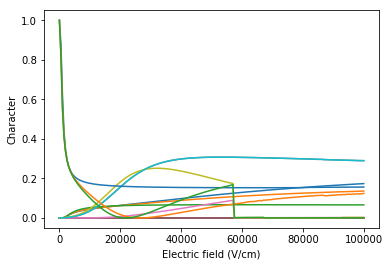

In [26]:
state_from = 5**2 + 6**2 - 6
state_to = 5**2 + 6**2 + 6
L_char = 2
print('State from: \t\t n=', n_vals[state_from], ', l=', L_vals[state_from], ', m=', m_vals[state_from])
print('State to: \t\t n=', n_vals[state_to], ', l=', L_vals[state_to], ', m=', m_vals[state_to])
print('Character: \t\t l=', L_char )

for state in np.arange(state_from, state_to+1, 1):
    eig_vec_with_char = eig_vecs[:, state, np.where(L_vals==L_char)]
    plt.plot(field, np.sum( eig_vec_with_char**2, axis=2 ) )

plt.xlabel('Electric field (V/cm)')
plt.ylabel('Character')